Çalışmada kullanılan verini seti Kaggle platformu üzerinden indirdim. Bu veri seti farklı otomobil markalarına ait özelliklerin (model, yıl, yakıt türü, motor hacmi, güç, kilometre, vb.) ve fiyatların yer aldığı bir veri setidir. Bu veri setini, otomobil fiyatlarına etki eden faktörleri keşfetmek ve bu verilere dayanarak tahmin modelleri kurulması için kullandım. Projede birçok yöntem kullanıp modellerin sonuçlarını sonuç kısmında karşılaştırdım.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score , accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor , RandomForestRegressor
from warnings import filterwarnings
filterwarnings('ignore')
data = pd.read_csv("CarPrice_Assignment.csv")
df = data.copy()
df = df.iloc[:,1:]
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2]:
# Veri kümesinde olan değişkenler(kategorik ve sürekli) hakkında bilgi edinmeyi amaçladım.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [3]:
# Burada veri kümesinin betimsel istatistiklerine bir bakış yaptım.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


In [4]:
# Değişkenler arasında var olan katsayıları sayısal olarak inceledim.
df.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


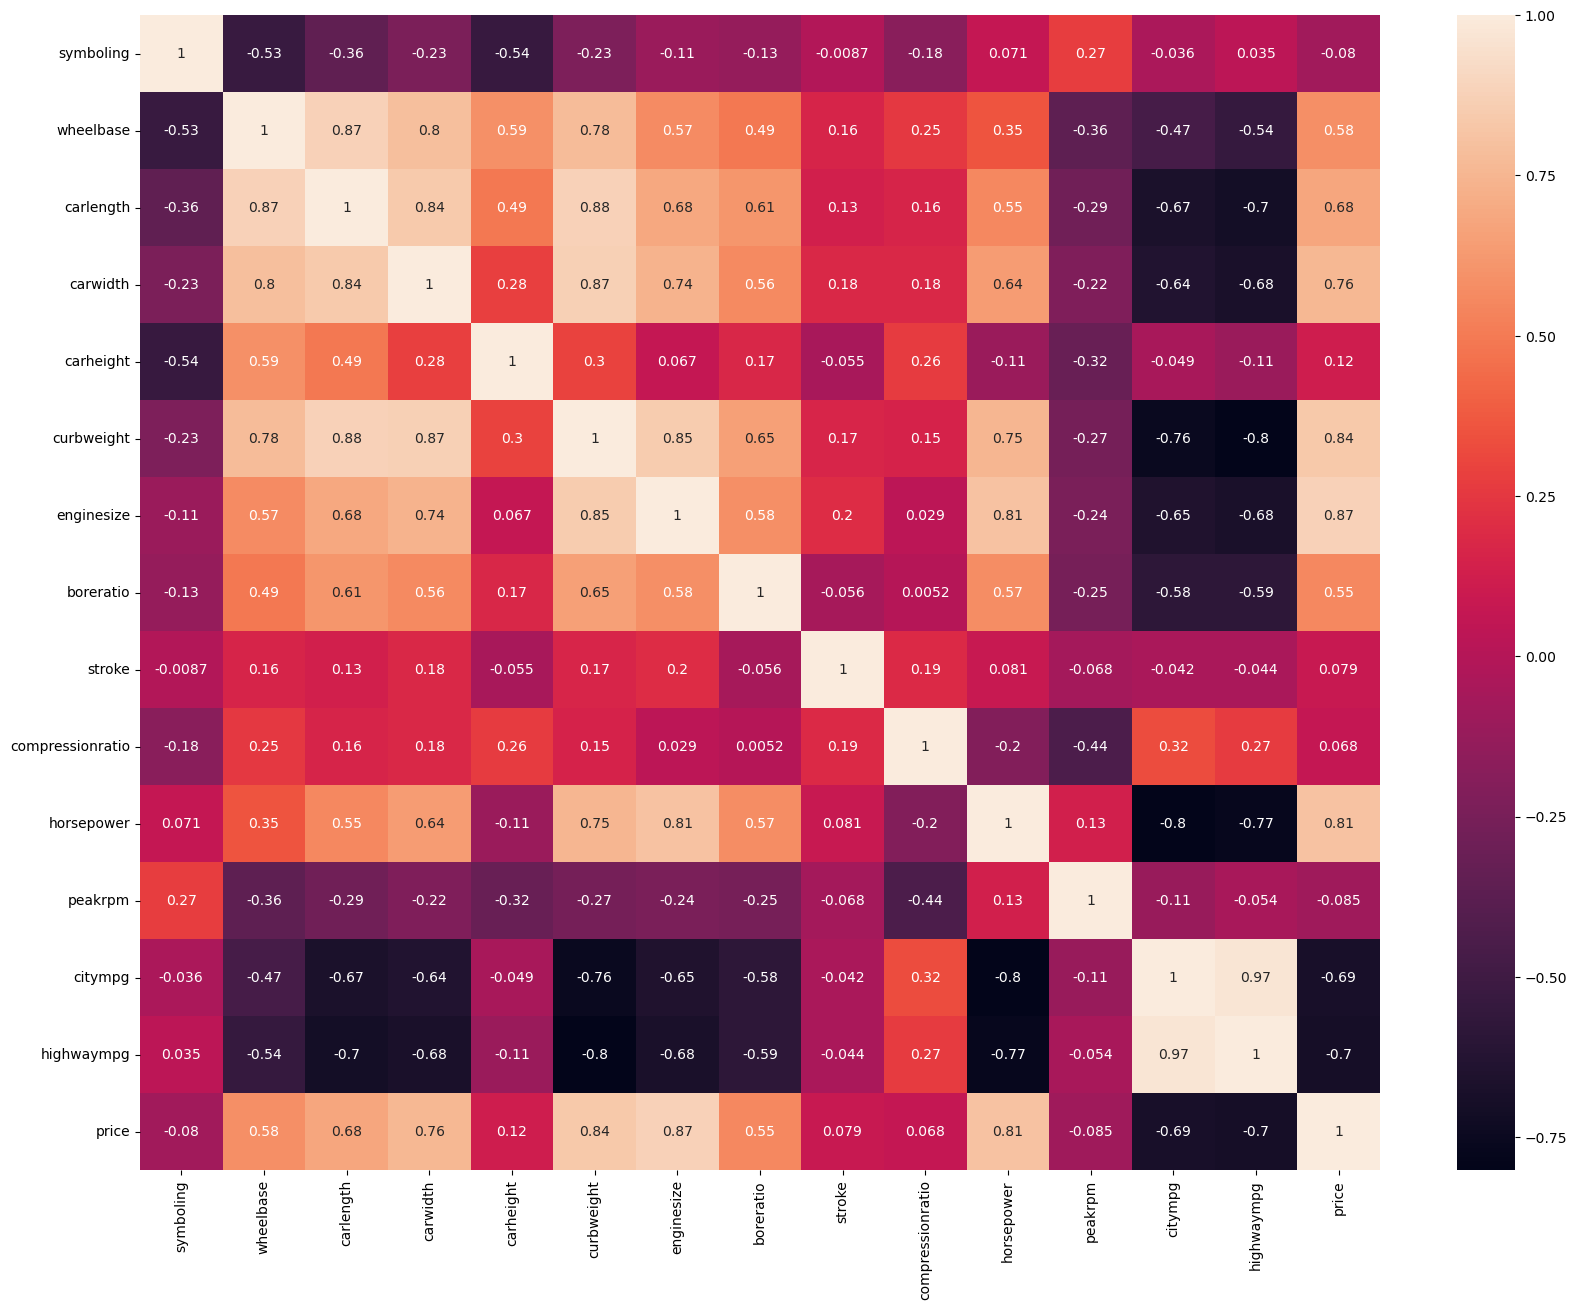

In [5]:
# Değişkenler arasında incelediğim katsayıları görselleştirdim. Görsel boyutunu büyüterek okunabilirliği artırmaya çalıştım.
corr_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True);

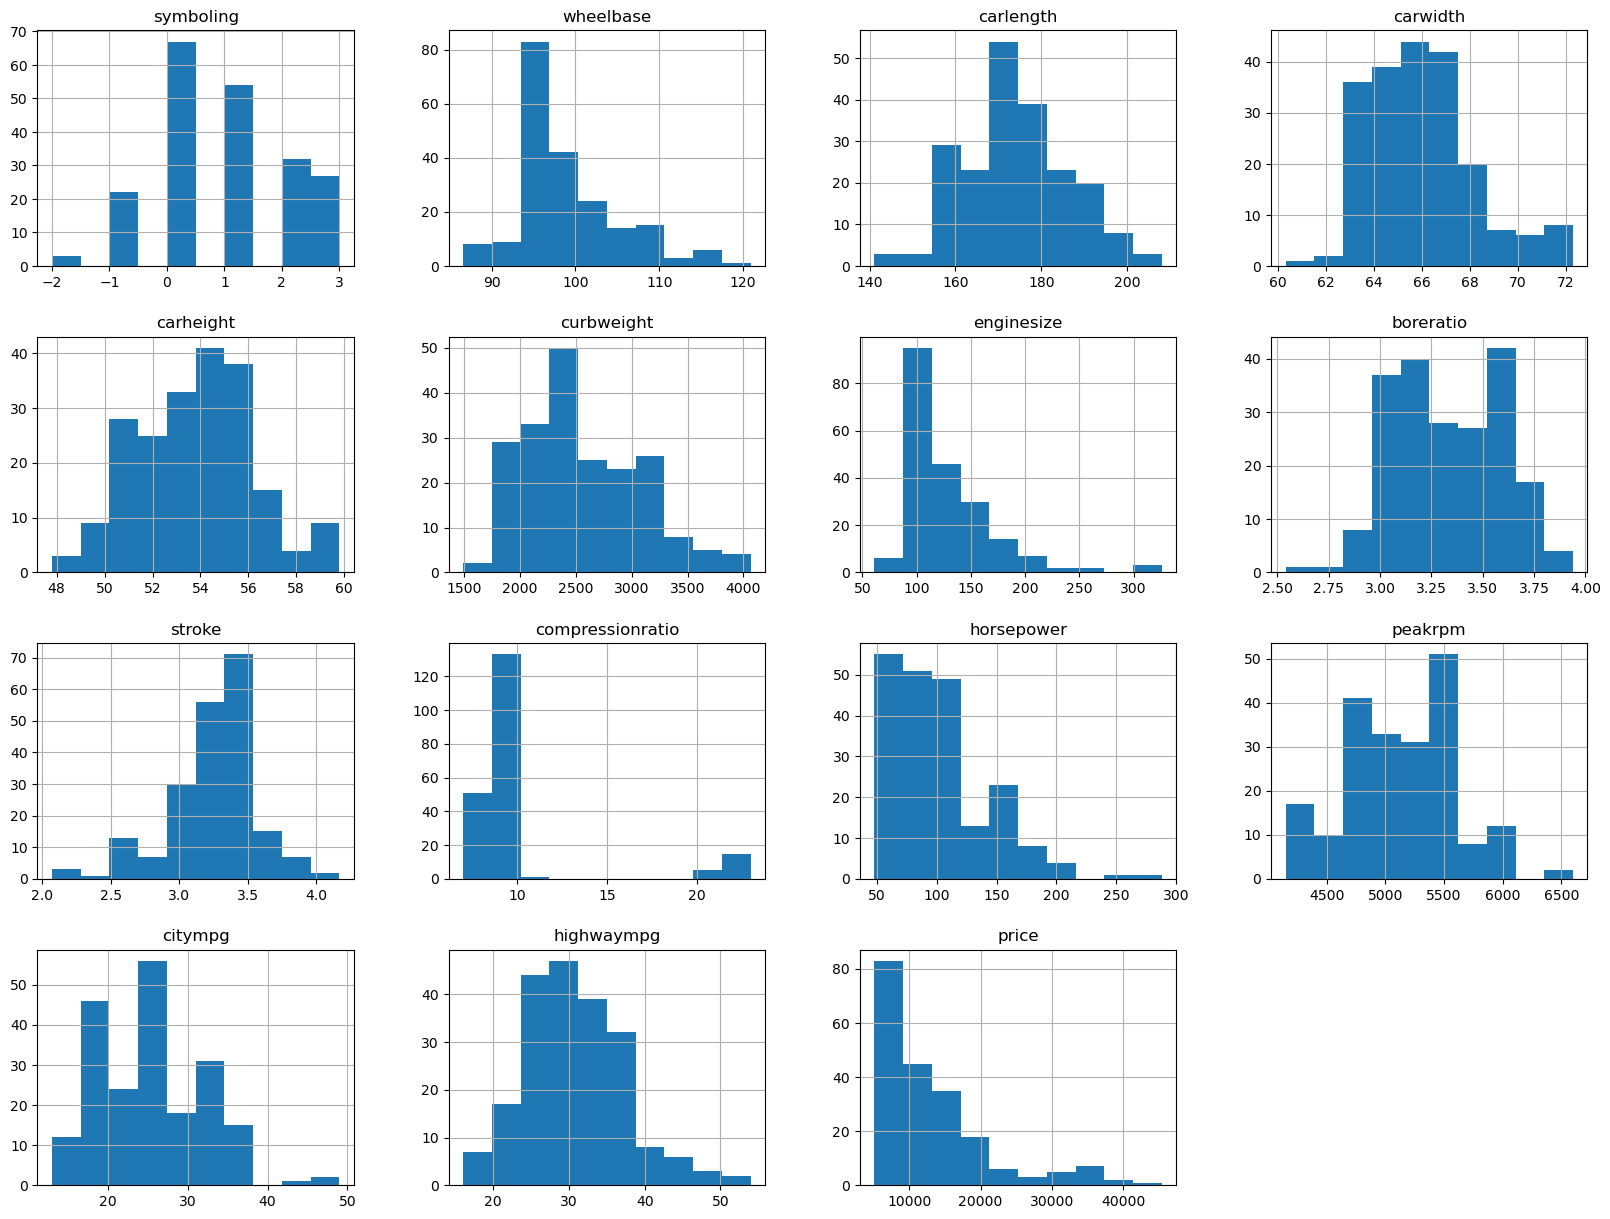

In [6]:
# Dataframe hakkında histogramlar çizdirerek dağılımları daha ayrıntılı inceledim.
df.hist(figsize = (20,15))
plt.show()

In [7]:
# Öncelikle kategorik değişkenleri sayısal ifadelere dönüştürmek için 'dummy değişkeni' olarak 
# bilinen yöntemi kullandım.
dums = pd.get_dummies(df[["CarName" , "fueltype" , "aspiration" , "carbody" , "drivewheel" ,
                          "enginelocation" , "enginetype" , "fuelsystem" ]])
# Burada bağımlı değişkeni ve bağımsız değişkenleri ayırıp veri kümesi üzerinde 
# bazı ayarlamalar yaptım.
y = df["price"]
X_ = df.drop(["price" , "CarName" , "fueltype" , "aspiration" , "carbody" , 
              "drivewheel" , "enginelocation" , "enginetype" , "fuelsystem"] , axis = 1)
X = pd.concat([X_ , dums] , axis = 1)
X["doornumber"] = X["doornumber"].replace({"two": 2, "four": 4})
X['cylindernumber'] = X['cylindernumber'].replace({'four' : 4 , 'six' : 6 ,'five' : 5 ,
                                                   'three' : 3,'twelve' : 12 , 'two' : 2 ,
                                                   'eight' : 8})

In [8]:
# Bağımsız değişkenlere genel bir bakış yaptım.
X.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
doornumber,205.0,3.121951,0.994966,2.0,2.0,4.0,4.0,4.0
wheelbase,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
carlength,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
carwidth,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
...,...,...,...,...,...,...,...,...
fuelsystem_idi,205.0,0.097561,0.297446,0.0,0.0,0.0,0.0,1.0
fuelsystem_mfi,205.0,0.004878,0.069843,0.0,0.0,0.0,0.0,1.0
fuelsystem_mpfi,205.0,0.458537,0.499498,0.0,0.0,0.0,1.0,1.0
fuelsystem_spdi,205.0,0.043902,0.205380,0.0,0.0,0.0,0.0,1.0


In [9]:
# Bağımlı değişkene bir bakış yaptım.
y.describe().T

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

# KNN

In [10]:
# Burada ilk olarak 'KNN' modelini kurdum. Veri setini eğitim ve test seti olarak ayarladım.
# Ardından 'fit' etme işlemi uygulayarak modelimi kurdum.Sonrasında modelde temel olarak ayarlanmış parametrelere
# göz attıktan sonra tahmin yapıp 'RMSE' değerini buldum.
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , 
                                                       random_state = 144)
knn_model = KNeighborsRegressor().fit(X_train , y_train)

In [11]:
knn_model.n_neighbors

5

In [12]:
knn_model.effective_metric_

'euclidean'

In [13]:
y_pred = knn_model.predict(X_test)

In [14]:
np.sqrt(mean_squared_error(y_test , y_pred))

2581.275324725503

In [15]:
# Burada en doğru 'n_neighbors' parametresini bulmak adına bir iterasyon işlemi gerçekleştirdim.
RMSE = [] 

for k in range(20):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)

k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  1853.3912848763655
k = 3 için RMSE değeri:  2338.754951176145
k = 4 için RMSE değeri:  2623.340091543873
k = 5 için RMSE değeri:  2891.2482958852725
k = 6 için RMSE değeri:  3104.0309593416528
k = 7 için RMSE değeri:  3260.512490827079
k = 8 için RMSE değeri:  3396.1418202846553
k = 9 için RMSE değeri:  3554.3167368909963
k = 10 için RMSE değeri:  3676.771357056625
k = 11 için RMSE değeri:  3828.6979731778697
k = 12 için RMSE değeri:  3932.6507712743637
k = 13 için RMSE değeri:  4096.1952468461395
k = 14 için RMSE değeri:  4275.544333238436
k = 15 için RMSE değeri:  4347.44112732371
k = 16 için RMSE değeri:  4341.696179714352
k = 17 için RMSE değeri:  4413.410539532763
k = 18 için RMSE değeri:  4529.369029229023
k = 19 için RMSE değeri:  4539.327400209572
k = 20 için RMSE değeri:  4620.709996793793


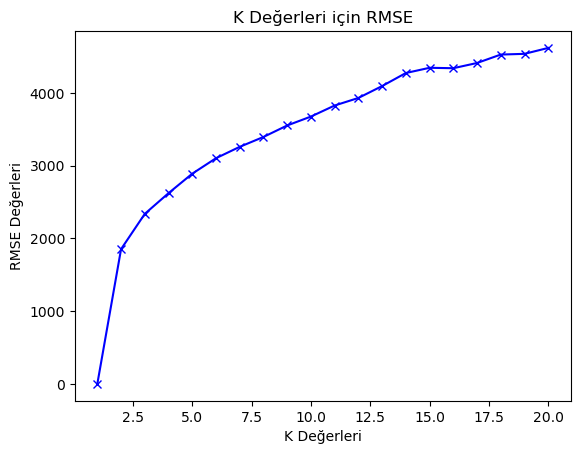

In [16]:
# Çıkan sonuçları bir grafiğe dökerek anlaşılabilirliğini artırdım.
K = range(1, 21)
plt.plot(K, RMSE, 'bx-')
plt.xlabel('K Değerleri')
plt.ylabel('RMSE Değerleri')
plt.title('K Değerleri için RMSE')
plt.show()

## Model Tuning

In [17]:
# Model Tuning bölümünde diğer modellerde de olduğu gibi amacom hiperparametre ayarlaması yapmak. Burada 'GridSearchCV'
# yöntemini kullandım. 10 katlı çarpraz doğrulama ('cv') kullandım. Amacım modelin aşırı uyma(ezberleme , overfitting)
# durumunun önüne geçmektir. 'n_neighbours' parametresi için 1-20 arasında iterasyon yaptım.
knn_params = {'n_neighbors': np.arange(1,20,1)}

In [18]:
knn = KNeighborsRegressor()

In [19]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)

In [20]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [21]:
print("Best parameters: ", knn_cv_model.best_params_)

Best parameters:  {'n_neighbors': 3}


In [22]:
# Tuning işlemlerinin ardından son 'RMSE' değeri ile ilk 'RMSE' değerini karşılaştırdım.
RMSE = [] 
RMSE_CV = []
for k in range(20):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )

k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  3944.3463292581123
k = 2 için RMSE değeri:  1853.3912848763655 RMSE_CV değeri:  3494.5538779044828
k = 3 için RMSE değeri:  2338.754951176145 RMSE_CV değeri:  3484.171937785813
k = 4 için RMSE değeri:  2623.340091543873 RMSE_CV değeri:  3616.0939115472256
k = 5 için RMSE değeri:  2891.2482958852725 RMSE_CV değeri:  3688.6346664240273
k = 6 için RMSE değeri:  3104.0309593416528 RMSE_CV değeri:  3751.9664952216103
k = 7 için RMSE değeri:  3260.512490827079 RMSE_CV değeri:  3846.425662218403
k = 8 için RMSE değeri:  3396.1418202846553 RMSE_CV değeri:  3967.939850917496
k = 9 için RMSE değeri:  3554.3167368909963 RMSE_CV değeri:  4120.569303004406
k = 10 için RMSE değeri:  3676.771357056625 RMSE_CV değeri:  4273.960942033741
k = 11 için RMSE değeri:  3828.6979731778697 RMSE_CV değeri:  4392.005457251092
k = 12 için RMSE değeri:  3932.6507712743637 RMSE_CV değeri:  4538.483350260106
k = 13 için RMSE değeri:  4096.1952468461395 RMSE_CV değeri:  4

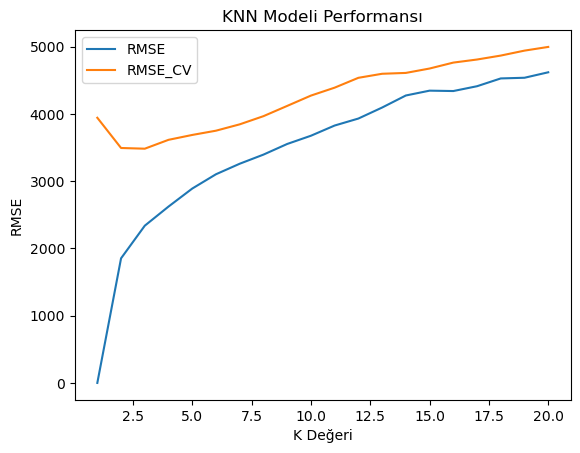

In [23]:
# Bulduğum 'RMSE' değerlerini görsel kullanarak daha anlaşılabilir hale getirmeye çalıştım.
K = np.arange(1, 21)
plt.plot(K, RMSE, label='RMSE')
plt.plot(K, RMSE_CV, label='RMSE_CV')
plt.xlabel('K Değeri')
plt.ylabel('RMSE')
plt.title('KNN Modeli Performansı')
plt.legend()
plt.show()

In [24]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [25]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [26]:
y_pred = knn_tuned.predict(X_test)

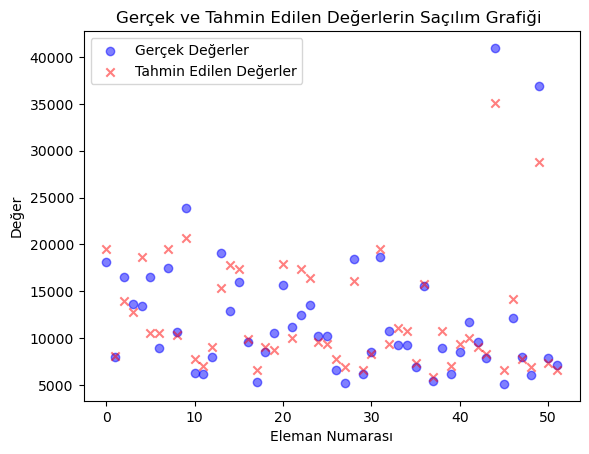

In [27]:
plt.scatter(range(len(y_test)), y_test, alpha=0.5, color='blue', marker='o', label='Gerçek Değerler')
plt.scatter(range(len(y_pred)), y_pred, alpha=0.5, color='red', marker='x', label='Tahmin Edilen Değerler')
plt.xlabel('Eleman Numarası')
plt.ylabel('Değer')
plt.title('Gerçek ve Tahmin Edilen Değerlerin Saçılım Grafiği ')
plt.legend()
plt.show()

In [28]:
# Burada kurduğum model ve yaptığım parametre ayarları neticesinde elde ettiğim min. 'RMSE' değerini ekrana yazdırdım.
KNN_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
KNN_RMSE

2451.130007555685

# SVR

In [29]:
# Burada ilk olarak 'SVR' modelini kurdum.# Ardından 'fit' etme işlemi uygulayarak modelimi kurdum.
# Sonra tahmin yapıp 'RMSE' değerini buldum.
from sklearn.svm import SVR

In [30]:
svr = SVR(kernel="rbf").fit(X_train , y_train)
svr_model = svr.fit(X_train , y_train)

In [31]:
y_pred = svr_model.predict(X_test)

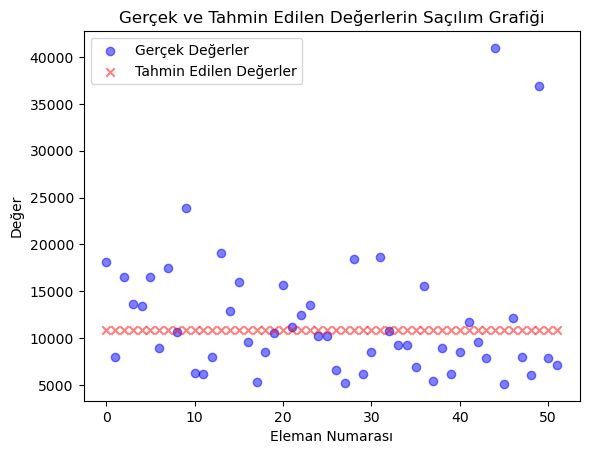

In [32]:
plt.scatter(range(len(y_test)), y_test, alpha=0.5, color='blue', marker='o', label='Gerçek Değerler')
plt.scatter(range(len(y_pred)), y_pred, alpha=0.5, color='red', marker='x', label='Tahmin Edilen Değerler')
plt.xlabel('Eleman Numarası')
plt.ylabel('Değer')
plt.title('Gerçek ve Tahmin Edilen Değerlerin Saçılım Grafiği')
plt.legend()
plt.show()


In [33]:
np.sqrt(mean_squared_error(y_test , y_pred))

7005.097288178883

## Model Tuning

In [34]:
# 'Model Tunning' kısmında 'C' parametresi için bir iterasyon yaptım.Yine 10 katlı çarprazlama yaparak optimum
# parametreleri elde etmeye çalıştım.
svr_params = {"C" : [0.01 , 0.1 , 0.4 , 5 , 10 , 20 , 30 , 40, 50]}
svr_cv_model = GridSearchCV(svr_model , svr_params , cv = 10)
svr_cv_model.fit(X_train , y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50]})

In [35]:
pd.Series(svr_cv_model.best_params_)[0]

50

In [36]:
svr_tuned = SVR(kernel = "rbf" , C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train , y_train)

In [37]:
y_pred = svr_tuned.predict(X_test)

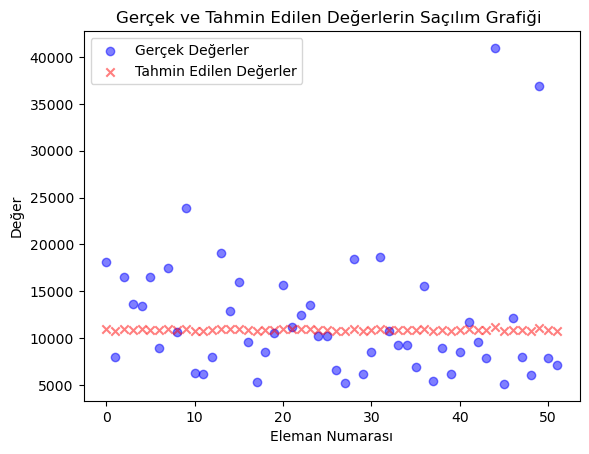

In [38]:
plt.scatter(range(len(y_test)), y_test, alpha=0.5, color='blue', marker='o', label='Gerçek Değerler')
plt.scatter(range(len(y_pred)), y_pred, alpha=0.5, color='red', marker='x', label='Tahmin Edilen Değerler')
plt.xlabel('Eleman Numarası')
plt.ylabel('Değer')
plt.title('Gerçek ve Tahmin Edilen Değerlerin Saçılım Grafiği ')
plt.legend()
plt.show()

In [39]:
# Burada kurduğum model ve yaptığım parametre ayarları neticesinde elde ettiğim min. 'RMSE' değerini ekrana yazdırdım.
SVR_RMSE = np.sqrt(mean_squared_error(y_test , y_pred))
SVR_RMSE

6935.648036872986

# Neural Networks

In [40]:
# Burada öncelikle özellikleri ölçeklendirmek adına 'StandardScaler' yöntemini kullandım.Ardından ölçeklendirilmiş
# kümeleri yeni değişkenlere atadım. 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [41]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# burada çok katmanlı yapay sinir ağı modelini kurdum.(Neural Networks). Gizli katman parametresini(hidden_layer)
# (100,20) olarak belirledim. Tahmin yapıp 'RMSE' değerini buldum.
from sklearn.neural_network import MLPRegressor

In [43]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled , y_train )

In [44]:
y_pred = mlp_model.predict(X_test_scaled)

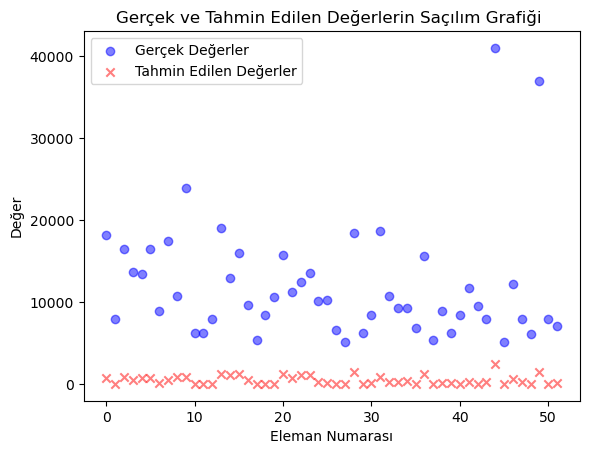

In [45]:
plt.scatter(range(len(y_test)), y_test, alpha=0.5, color='blue', marker='o', label='Gerçek Değerler')
plt.scatter(range(len(y_pred)), y_pred, alpha=0.5, color='red', marker='x', label='Tahmin Edilen Değerler')
plt.xlabel('Eleman Numarası')
plt.ylabel('Değer')
plt.title('Gerçek ve Tahmin Edilen Değerlerin Saçılım Grafiği ')
plt.legend()
plt.show()

In [46]:
np.sqrt(mean_squared_error(y_test , y_pred))

13131.556516962533

## Model Tuning

In [47]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [48]:
# Model Tuning kısmında 'alpha' , 'hidden_layer' ve 'activation' parametrelerini kullanarak bir iterasyon yaptım.
# 'GridSearcCV' yöntemini kullandım ve 10 katlı çarprazlama yaparak en iyi parametrelere ulaşmayı denedim.
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic']}

In [49]:
mlp_cv_model = GridSearchCV(mlp_model , mlp_params , cv = 10 , n_jobs = -1)

In [50]:
mlp_cv_model.fit(X_train_scaled , y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [51]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.02, 'hidden_layer_sizes': (300, 200, 150)}

In [52]:
mlp_tuned = MLPRegressor(alpha = 0.01 , hidden_layer_sizes = (300, 200, 150) , activation = 'relu')

In [53]:
mlp_tuned.fit(X_train_scaled , y_train)

MLPRegressor(alpha=0.01, hidden_layer_sizes=(300, 200, 150))

In [54]:
y_pred = mlp_tuned.predict(X_test_scaled)

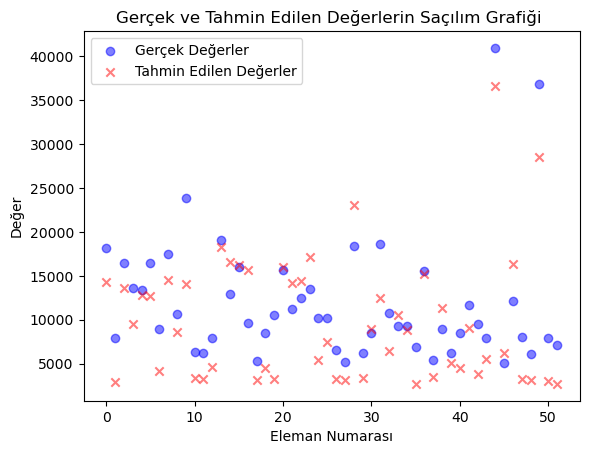

In [55]:
plt.scatter(range(len(y_test)), y_test, alpha=0.5, color='blue', marker='o', label='Gerçek Değerler')
plt.scatter(range(len(y_pred)), y_pred, alpha=0.5, color='red', marker='x', label='Tahmin Edilen Değerler')
plt.xlabel('Eleman Numarası')
plt.ylabel('Değer')
plt.title('Gerçek ve Tahmin Edilen Değerlerin Saçılım Grafiği ')
plt.legend()
plt.show()

In [56]:
# Burada Tuning işlemi sonrasında min. 'RMSE' değerini buldum.
NN_RMSE = np.sqrt(mean_squared_error(y_test , y_pred))
NN_RMSE

3915.270900766957

# CART

In [57]:
# Bu kısımdan sonra ağaca dayalı yöntemlerle modeller kurulmuştur. Öncelikle 'CART' modeli ile başladım.

In [58]:
cart_model = DecisionTreeRegressor()

In [59]:
cart_model.fit(X_train , y_train)

DecisionTreeRegressor()

In [60]:
!pip install skompiler

In [61]:
!pip install astor

In [62]:
from skompiler import skompile

In [63]:
# Burada 'CART' ile oluşturduğum model sonucunda ortaya çıkan fonksiyonu Python kodlarına çevirdim.
print(skompile(cart_model.predict).to('python/code'))

(((((((((((6338.0 if x[1] <= 3.0 else 6488.0) if x[10] <= 3.090000033378601
     else (((6695.0 if x[10] <= 3.190000057220459 else 6692.0) if x[6] <= 
    1996.5 else 6669.0) if x[77] <= 0.5 else 6795.0) if x[43] <= 0.5 else 
    6377.0) if x[74] <= 0.5 else 7395.0) if x[44] <= 0.5 else 7609.0) if x[
    15] <= 39.5 else (5151.0 if x[2] <= 91.04999923706055 else 5572.0 if x[
    14] <= 37.5 else 5399.0) if x[10] <= 3.3200000524520874 else 6479.0) if
    x[12] <= 68.5 else (((((6849.0 if x[0] <= 1.5 else 6855.0) if x[97] <= 
    0.5 else 6649.0) if x[53] <= 0.5 else 6529.0) if x[16] <= 0.5 else 
    5499.0) if x[6] <= 1945.5 else (((7198.0 if x[0] <= 0.5 else 7129.0) if
    x[5] <= 52.89999961853027 else 6938.0 if x[5] <= 53.35000038146973 else
    7053.0) if x[2] <= 96.0999984741211 else 7295.0) if x[14] <= 30.5 else 
    8249.0 if x[3] <= 163.8499984741211 else ((7299.0 if x[1] <= 3.0 else 
    7349.0) if x[92] <= 0.5 else 7499.0) if x[6] <= 2026.0 else (7738.0 if 
    x[13] <= 5000.0

In [64]:
cart_model.predict(X_train)[0:5]

array([15645., 11850.,  9233., 17950., 15040.])

In [65]:
y_test[0:5]

136    18150.0
23      7957.0
75     16503.0
57     13645.0
195    13415.0
Name: price, dtype: float64

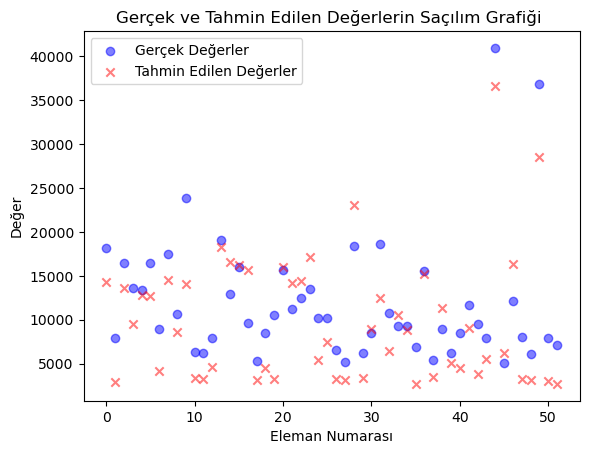

In [66]:
# Burada gerçek test setinde olan değerler ile tahmin edilen değerleri karşılaştırmak için bir saçılım grafiği çizdirdim.
plt.scatter(range(len(y_test)), y_test, alpha=0.5, color='blue', marker='o', label='Gerçek Değerler')
plt.scatter(range(len(y_pred)), y_pred, alpha=0.5, color='red', marker='x', label='Tahmin Edilen Değerler')
plt.xlabel('Eleman Numarası')
plt.ylabel('Değer')
plt.title('Gerçek ve Tahmin Edilen Değerlerin Saçılım Grafiği ')
plt.legend()
plt.show()

In [67]:
y_pred = cart_model.predict(X_test)

In [68]:
np.sqrt(mean_squared_error(y_test , y_pred))

2553.0307159410486

# Model Tuning

In [69]:
# Burada parametre analizi yapmak için model hakkında parametreleri inceledim.
?cart_model

Type:        DecisionTreeRegressor
String form: DecisionTreeRegressor()
File:        c:\users\karacik\anaconda3\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minimizes
    the L1 loss using the median of each terminal node, and "poisson" which
    uses reduction in Poisson deviance to find splits.

    .. versionadded:: 0.18
       Mean Absolute Error (MAE)

In [70]:
# 'CART' modelindeki çok etkili olduğunu gördüğüm parametrelerden iki tanesi için iterasyon yaparak optimum parametre
# ayarlarını yapmaya çalıştım.
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

In [71]:
cart_cv_model = GridSearchCV(cart_model , cart_params , cv = 10)

In [72]:
cart_cv_model.fit(X_train , y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [73]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 25}

In [74]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9 , min_samples_split = 25)

In [75]:
cart_tuned.fit(X_train , y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=25)

In [76]:
cart_tuned.predict(X_test)[0:5]

array([15008.80835   ,  7425.77777778, 19774.91666667, 13171.66666667,
       19774.91666667])

In [77]:
y_test[0:5]

136    18150.0
23      7957.0
75     16503.0
57     13645.0
195    13415.0
Name: price, dtype: float64

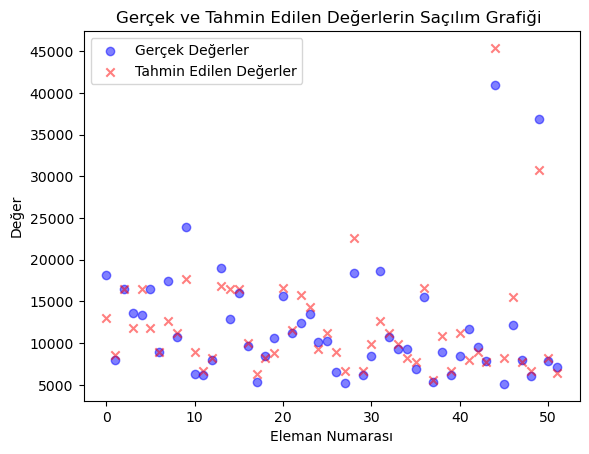

In [78]:
# Burada Tuning işleminden sonra gerçek test setinde olan değerler ile tahmin edilen 
# değerleri karşılaştırmak için bir saçılım grafiği çizdirdim.
plt.scatter(range(len(y_test)), y_test, alpha=0.5, color='blue', marker='o', label='Gerçek Değerler')
plt.scatter(range(len(y_pred)), y_pred, alpha=0.5, color='red', marker='x', label='Tahmin Edilen Değerler')
plt.xlabel('Eleman Numarası')
plt.ylabel('Değer')
plt.title('Gerçek ve Tahmin Edilen Değerlerin Saçılım Grafiği ')
plt.legend()
plt.show()

In [79]:
y_pred = cart_tuned.predict(X_test)

In [80]:
# Burada elde ettiğim parametreleri de kullanarak min. 'RMSE' değerini buldum.
CART_RMSE = np.sqrt(mean_squared_error(y_test , y_pred))
CART_RMSE

2537.027464742795

# Bagged Trees Regression

In [81]:
# Burada birden fazla karar ağacını getiren 'Bagged Trees Regression' yöntemi ile modeli kurdum.
bag_model = BaggingRegressor(bootstrap_features = True)

In [82]:
bag_model.fit(X_train , y_train)

BaggingRegressor(bootstrap_features=True)

In [83]:
bag_model.n_estimators

10

In [84]:
bag_model.estimators_

[DecisionTreeRegressor(random_state=1945893698),
 DecisionTreeRegressor(random_state=447969780),
 DecisionTreeRegressor(random_state=1339061108),
 DecisionTreeRegressor(random_state=41719126),
 DecisionTreeRegressor(random_state=562767650),
 DecisionTreeRegressor(random_state=676917793),
 DecisionTreeRegressor(random_state=1847570397),
 DecisionTreeRegressor(random_state=684381690),
 DecisionTreeRegressor(random_state=2030791892),
 DecisionTreeRegressor(random_state=956139588)]

In [85]:
bag_model.estimators_samples_

[array([113,   4, 142,  20, 123,  21,  91,  47,  12,  20, 151,  85,  36,
        143, 150,  84,  59, 137,  17,  83,  89,  88,  83,  59,  35, 111,
        119, 104,  93, 121, 126, 146,  57,  76,  37, 100, 118, 136,  11,
         86, 116,  76, 149,  49,  82,  70, 128,  40,  78, 107,  43, 145,
        118,  29, 110,  57, 139,  45, 103,  43,  38,  76, 136, 119,  54,
         54, 114,  83,  35, 113,  92,  63, 125,  54, 102,  98, 150, 118,
         69,  68,  11,  70, 146,  92,  28,  13, 132,  59,  85,  64,  42,
         28,  11, 120,  25,  41, 151,  75, 132,  91,  91,  86, 109, 126,
         27, 107,  11, 139,  67, 138, 147, 125,  57, 106,  41, 130, 137,
        151,  75,  78, 102,  23,  55,  47,  96,  95, 127, 134,  22,  30,
         15, 121, 123,  58,  55, 140, 121, 140, 139, 100,  61,  89,  66,
          0,  94, 100,  65,  80, 119,  88,  40,  56,  96]),
 array([ 17,  76,  57,  92, 149,   3,  67,  49,  26,  43,  31,  96, 133,
         49,   6,  40,  48,   0,  94,  70, 134,   1, 111,  42, 1

In [86]:
bag_model.estimators_features_

[array([ 66,  21, 188, 153,  86,  11,  38, 109, 158, 115,  98,  83,  26,
        109,  81,   4,  12, 107, 145, 169,   1,  60,  20,  91, 174, 186,
        138,  48,  47, 114, 152, 112, 170,  25, 179,  21,   2, 137, 184,
         63, 122, 181,  11,  81,  34, 159, 107,   6, 149,  51, 152,  71,
        191,  37, 129,  66,  21,   6,  43,  96,  39, 190,  31,  54,   7,
        165, 127,  15, 127, 184,   2,  71, 152,  21,  25,  25, 159, 124,
        107,  80,  12, 157, 106,  67, 176, 106,   5,  68, 153, 117, 167,
        183,  84, 141, 165, 158, 115, 168,  92, 118, 107,  46, 181, 126,
          2,   7,   3,  54, 131, 153, 102, 191, 145, 169,  87,  49,  16,
         31, 130,  67,  73,  19, 117,  78, 157,  73,  13,  88, 112,  11,
        182,  21,  92,  49,  86, 101, 190, 110, 143,  30,  51,  18, 131,
        189, 130,  92,  71,   1,  63,  59, 144,  74,  37,  48, 127, 155,
        172, 170, 143, 133, 153, 155, 169,  80,   4, 136,  53,  88, 186,
        158,  95,  61,  39, 184,  43,  80, 154, 173

In [87]:
bag_model.estimators_[1]

DecisionTreeRegressor(random_state=447969780)

In [88]:
y_pred = bag_model.predict(X_test)

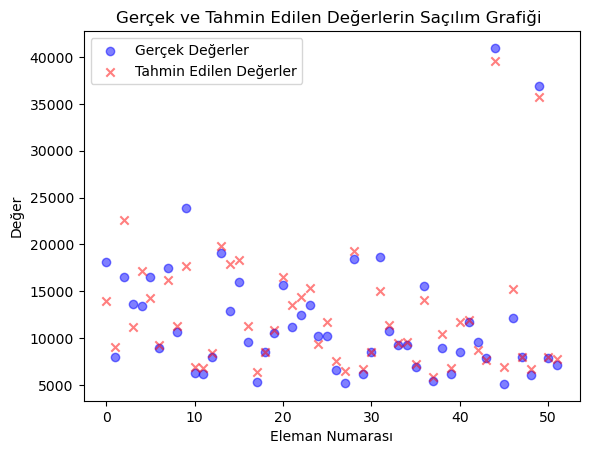

In [89]:
# Burada gerçek test setinde olan değerler ile tahmin edilen değerleri karşılaştırmak için bir saçılım grafiği çizdirdim.
plt.scatter(range(len(y_test)), y_test, alpha=0.5, color='blue', marker='o', label='Gerçek Değerler')
plt.scatter(range(len(y_pred)), y_pred, alpha=0.5, color='red', marker='x', label='Tahmin Edilen Değerler')
plt.xlabel('Eleman Numarası')
plt.ylabel('Değer')
plt.title('Gerçek ve Tahmin Edilen Değerlerin Saçılım Grafiği ')
plt.legend()
plt.show()

In [90]:
np.sqrt(mean_squared_error(y_test , y_pred))

2079.9304046279967

## Model Tuning

In [91]:
# Bu modelde 'Model Tuning' işlemi için sadece 'n_estimators' parametresini kullanarak optimum karar ağacı sayısını
# iterasyon yardımı ile bulmaya çalıştım.
bag_params = {"n_estimators": range(2,20)}

In [92]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)

In [93]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 20)})

In [94]:
bag_cv_model.best_params_

{'n_estimators': 11}

In [95]:
bag_tuned = BaggingRegressor( n_estimators = 14, random_state = 45)

In [96]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(n_estimators=14, random_state=45)

In [97]:
y_pred = bag_tuned.predict(X_test)

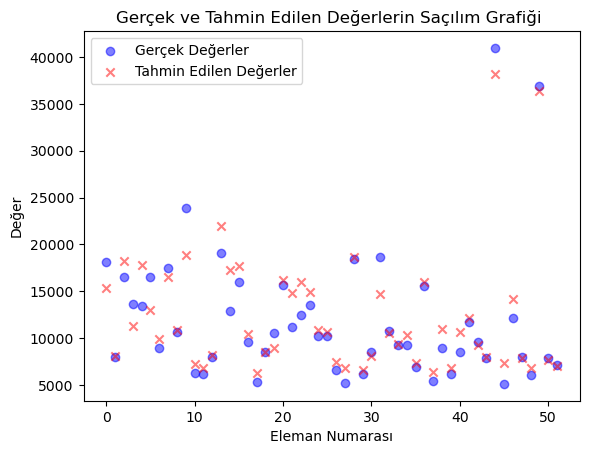

In [98]:
# Burada Tuning işleminden sonra gerçek test setinde olan değerler ile tahmin edilen 
# değerleri karşılaştırmak için bir saçılım grafiği çizdirdim.
plt.scatter(range(len(y_test)), y_test, alpha=0.5, color='blue', marker='o', label='Gerçek Değerler')
plt.scatter(range(len(y_pred)), y_pred, alpha=0.5, color='red', marker='x', label='Tahmin Edilen Değerler')
plt.xlabel('Eleman Numarası')
plt.ylabel('Değer')
plt.title('Gerçek ve Tahmin Edilen Değerlerin Saçılım Grafiği ')
plt.legend()
plt.show()

In [99]:
# Burada elde ettiğim parametreleri de kullanarak min. 'RMSE' değerini buldum.
BAG_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
BAG_RMSE

1893.7187253707032

# Random Forests

In [100]:
# Bu kısımda modeli 'Random Forests' yöntemi ile oluşturdum.Amacım birçok karar ağacı oluşturup hepsini bir araya getirmektir.
rf_model = RandomForestRegressor(random_state = 42)

In [101]:
rf_model.fit(X_train , y_train)

RandomForestRegressor(random_state=42)

In [102]:
y_pred = rf_model.predict(X_test)

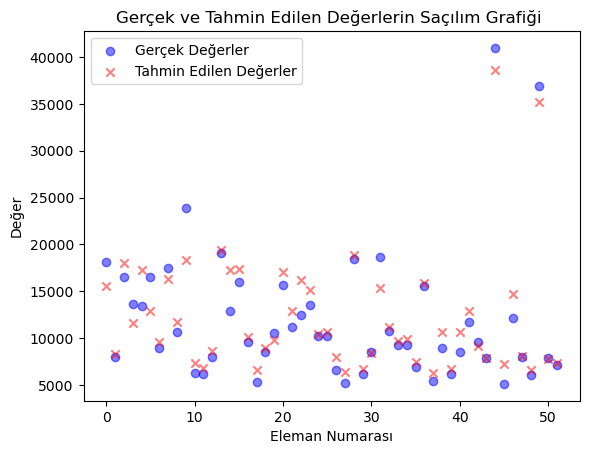

In [103]:
# Tahmin edilen değerler ile gerçek değerler arasında ki farkı gösteremek için gerçek değerlerin ve tahmin edilen 
# değerlerin birbirine karşı konulduğu bir saçılım grafiği çizdim.
plt.scatter(range(len(y_test)), y_test, alpha=0.5, color='blue', marker='o', label='Gerçek Değerler')
plt.scatter(range(len(y_pred)), y_pred, alpha=0.5, color='red', marker='x', label='Tahmin Edilen Değerler')
plt.xlabel('Eleman Numarası')
plt.ylabel('Değer')
plt.title('Gerçek ve Tahmin Edilen Değerlerin Saçılım Grafiği ')
plt.legend()
plt.show()

In [104]:
np.sqrt(mean_squared_error(y_test , y_pred))

1801.9776487588415

## Model Tuning

In [105]:
# Araştırmalarım sonucunda modelin doğruluğunu büyük oranda etkileyecek olan 3 parametre buldum.Bu parametrelerden
# GridSearchCV yöntemi kullanarak yaptığım iterasyon işlemleri sonucunda optimum değerleri bulmaya çalıştım.
rf_params = {'max_depth': list(range(10,20)),
            'max_features': [20, 25, 30, 35],
            'n_estimators' : [40, 80, 100]}

In [106]:
rf_model = RandomForestRegressor(random_state = 42)

In [107]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1)

In [108]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
                         'max_features': [20, 25, 30, 35],
                         'n_estimators': [40, 80, 100]})

In [109]:
rf_cv_model.best_params_

{'max_depth': 16, 'max_features': 35, 'n_estimators': 100}

In [110]:
rf_tuned = RandomForestRegressor(max_depth = 16 , max_features = 35 , n_estimators = 10)

In [111]:
rf_tuned.fit(X_train , y_train)

RandomForestRegressor(max_depth=16, max_features=35, n_estimators=10)

In [112]:
y_pred = rf_tuned.predict(X_test)

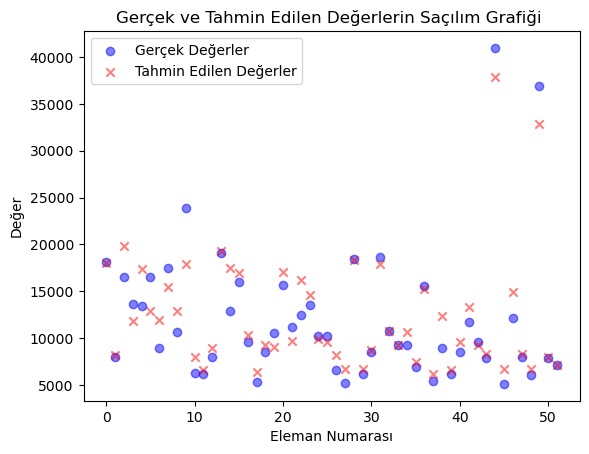

In [113]:
# Tuning işlemlerinden sonra tahmin edilen değerler ile gerçek değerler arasında ki farkı gösteremek için 
# gerçek değerlerin ve tahmin edilen değerlerin birbirine karşı konulduğu bir saçılım grafiği çizdim.
plt.scatter(range(len(y_test)), y_test, alpha=0.5, color='blue', marker='o', label='Gerçek Değerler')
plt.scatter(range(len(y_pred)), y_pred, alpha=0.5, color='red', marker='x', label='Tahmin Edilen Değerler')
plt.xlabel('Eleman Numarası')
plt.ylabel('Değer')
plt.title('Gerçek ve Tahmin Edilen Değerlerin Saçılım Grafiği ')
plt.legend()
plt.show()

In [114]:
# Burada elde ettiğim parametreleri de kullanarak min. 'RMSE' değerini buldum.
RF_RMSE = np.sqrt(mean_squared_error(y_test , y_pred))
RF_RMSE

1997.204355015743

# Gradient Boosting Machines

In [115]:
# Bu kısımda modeli 'Gradient Boosting Machines' yöntemi ile oluşturdum.Amacım birçok zayıf öğreniciyi hatalar 
# üstüne birleştirip yüksek verimli model oluşturmaktır.
from sklearn.ensemble import GradientBoostingRegressor

In [116]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train , y_train)

GradientBoostingRegressor()

In [117]:
y_pred = gbm_model.predict(X_test)

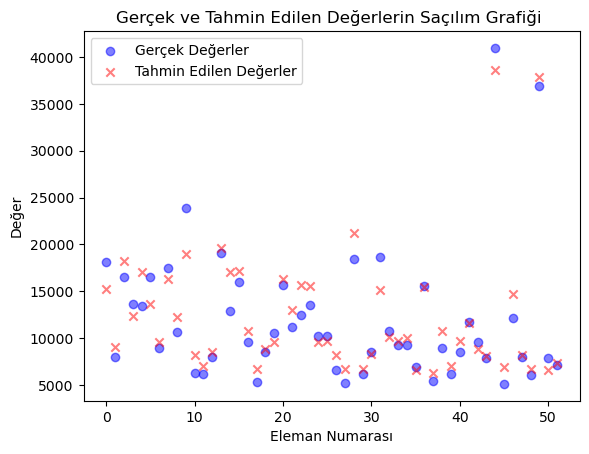

In [118]:
plt.scatter(range(len(y_test)), y_test, alpha=0.5, color='blue', marker='o', label='Gerçek Değerler')
plt.scatter(range(len(y_pred)), y_pred, alpha=0.5, color='red', marker='x', label='Tahmin Edilen Değerler')
plt.xlabel('Eleman Numarası')
plt.ylabel('Değer')
plt.title('Gerçek ve Tahmin Edilen Değerlerin Saçılım Grafiği ')
plt.legend()
plt.show()

In [119]:
np.sqrt(mean_squared_error(y_test , y_pred))

1769.6170324551883

## Model Tuning

In [120]:
# Araştırmalarım sonucunda modelin doğruluğunu büyük oranda etkileyecek olan 4 parametre buldum.Bu parametrelerden
# GridSearchCV yöntemi kullanarak yaptığım iterasyon işlemleri sonucunda optimum değerleri bulmaya çalıştım.
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [121]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [122]:
gbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 50, 'n_estimators': 1000, 'subsample': 0.5}

In [123]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.2,  
                                      max_depth = 100, 
                                      n_estimators = 1000, 
                                      subsample = 0.5)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [124]:
y_pred = gbm_tuned.predict(X_test)

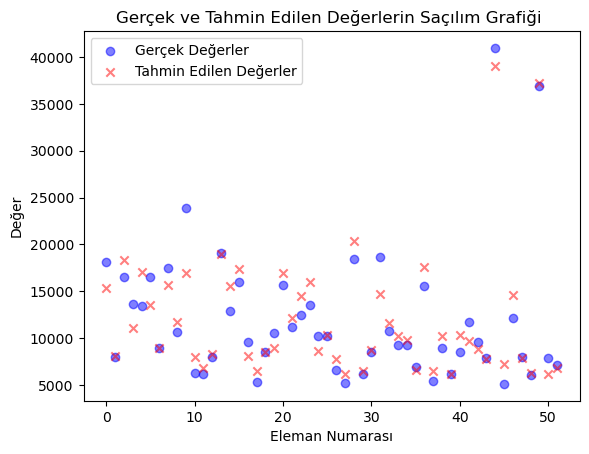

In [125]:
plt.scatter(range(len(y_test)), y_test, alpha=0.5, color='blue', marker='o', label='Gerçek Değerler')
plt.scatter(range(len(y_pred)), y_pred, alpha=0.5, color='red', marker='x', label='Tahmin Edilen Değerler')
plt.xlabel('Eleman Numarası')
plt.ylabel('Değer')
plt.title('Gerçek ve Tahmin Edilen Değerlerin Saçılım Grafiği ')
plt.legend()
plt.show()

In [126]:
GBM_RMSE = np.sqrt(mean_squared_error(y_test , y_pred))
GBM_RMSE

1866.750761961682

# XGBoost

In [127]:
!pip install xgboost

In [128]:
# Burada ağaca dayalı yöntemlerden 'XGBoost' kullandım.Aşağıda format düzenlemesi için bir matris
# fonksiyonu kullandım. Ardından diğer modellerde ki gibi tahminler yapıp hatayı ölçtüm.
import xgboost as xgb

In [129]:
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [130]:
from xgboost import XGBRegressor

In [131]:
xgb_model = XGBRegressor().fit(X_train, y_train)

In [132]:
y_pred = xgb_model.predict(X_test)

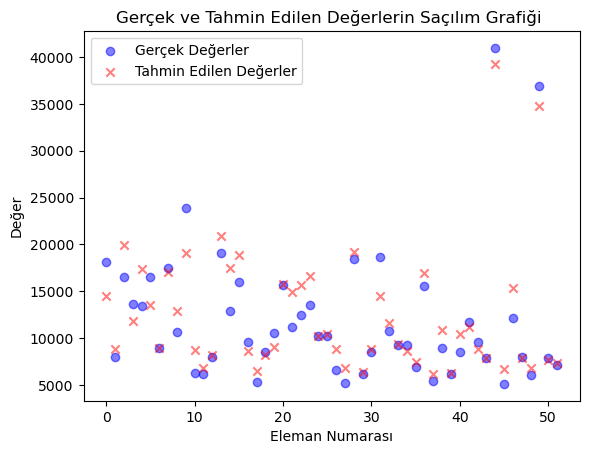

In [133]:
plt.scatter(range(len(y_test)), y_test, alpha=0.5, color='blue', marker='o', label='Gerçek Değerler')
plt.scatter(range(len(y_pred)), y_pred, alpha=0.5, color='red', marker='x', label='Tahmin Edilen Değerler')
plt.xlabel('Eleman Numarası')
plt.ylabel('Değer')
plt.title('Gerçek ve Tahmin Edilen Değerlerin Saçılım Grafiği ')
plt.legend()
plt.show()

In [134]:
np.sqrt(mean_squared_error(y_test, y_pred))

2045.588341347811

## Model Tuning

In [135]:
# Araştırmalarım sonucunda modelin doğruluğunu büyük oranda etkileyecek olan 4 parametre buldum.Bu parametrelerden
# GridSearchCV yöntemi kullanarak yaptığım iterasyon işlemleri sonucunda optimum değerleri bulmaya çalıştım.
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}

In [136]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.1, 0.01, 0.5],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 500, 1000]},
             verbose=2)

In [137]:
xgb_cv.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100}

In [138]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.4, 
                         learning_rate = 0.1, 
                         max_depth = 3, 
                         n_estimators = 100) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [139]:
y_pred = xgb_tuned.predict(X_test)

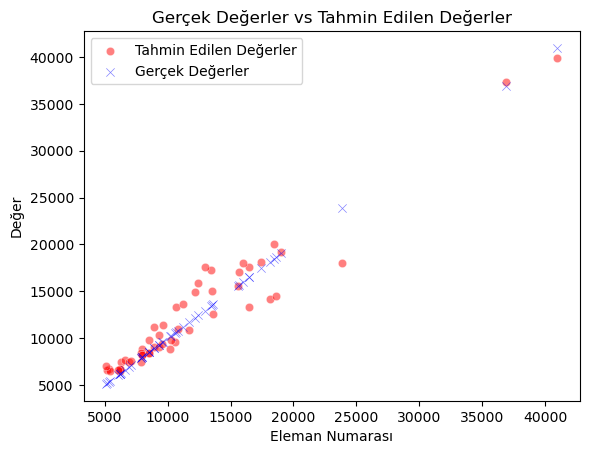

In [140]:
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='red', marker='o', label='Tahmin Edilen Değerler')
sns.scatterplot(x=y_test, y=y_test, alpha=0.5, color='blue', marker='x', label='Gerçek Değerler')
plt.xlabel('Eleman Numarası')
plt.ylabel('Değer')
plt.title('Gerçek Değerler vs Tahmin Edilen Değerler')
plt.legend()
plt.show()

In [141]:
XGBM_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
XGBM_RMSE

1913.2596194380835

# Light GBM

In [142]:
!pip install lightgbm

In [143]:
# Burada ağaca dayalı yöntemlerden 'Light GBM' kullandım.Aşağıda format düzenlemesi için bir matris
# fonksiyonu kullandım. Ardından diğer modellerde ki gibi tahminler yapıp hatayı ölçtüm.Son üç model birbiri
# üzerine iyileştirilmiş modellerdir. Hiyerarşi içinde yavaştan hızlıya göre yerleştirdim.
from lightgbm import LGBMRegressor

In [144]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

In [145]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

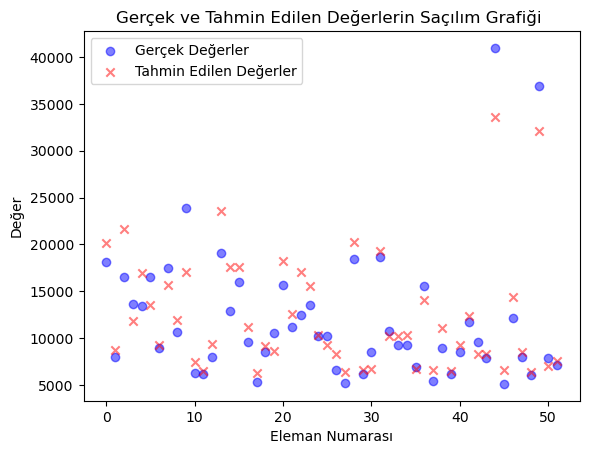

In [146]:
plt.scatter(range(len(y_test)), y_test, alpha=0.5, color='blue', marker='o', label='Gerçek Değerler')
plt.scatter(range(len(y_pred)), y_pred, alpha=0.5, color='red', marker='x', label='Tahmin Edilen Değerler')
plt.xlabel('Eleman Numarası')
plt.ylabel('Değer')
plt.title('Gerçek ve Tahmin Edilen Değerlerin Saçılım Grafiği ')
plt.legend()
plt.show()

In [147]:
np.sqrt(mean_squared_error(y_test, y_pred))

2437.963529996202

# Model Tuning

In [148]:
## Araştırmalarım sonucunda modelin doğruluğunu büyük oranda etkileyecek olan 4 parametre buldum.Bu parametrelerden
# GridSearchCV yöntemi kullanarak yaptığım iterasyon işlemleri sonucunda optimum değerleri bulmaya çalıştım.
lgbm_grid = {
    'colsample_bytree': [0.3, 0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000, 1500],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [149]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 1344 candidates, totalling 13440 fits


GridSearchCV(cv=10, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [20, 40, 100, 200, 500, 1000, 1500]},
             verbose=2)

In [150]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 1500}

In [151]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 5, 
                           n_estimators = 1500,
                           colsample_bytree = 0.3)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [152]:
y_pred = lgbm_tuned.predict(X_test)

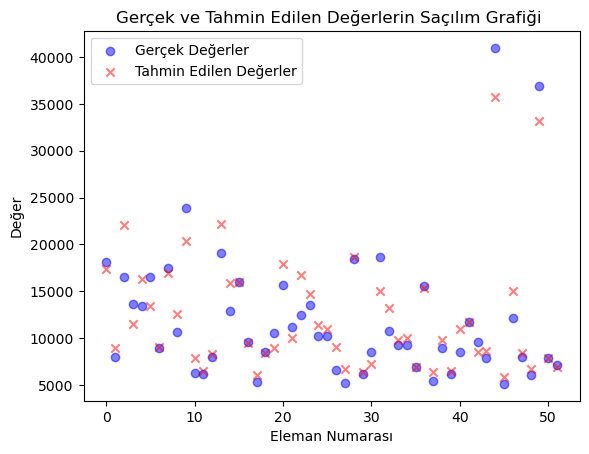

In [153]:
plt.scatter(range(len(y_test)), y_test, alpha=0.5, color='blue', marker='o', label='Gerçek Değerler')
plt.scatter(range(len(y_pred)), y_pred, alpha=0.5, color='red', marker='x', label='Tahmin Edilen Değerler')
plt.xlabel('Eleman Numarası')
plt.ylabel('Değer')
plt.title('Gerçek ve Tahmin Edilen Değerlerin Saçılım Grafiği ')
plt.legend()
plt.show()

In [154]:
LGBM_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
LGBM_RMSE

2035.5259841517009

# Sonuç

In [155]:
data = {'Model': ['KNN', 'SVR', 'NN', 'CART', 'BAG', 'RF', 'GBM', 'XGBM', 'LGBM'],
        'RMSE': [KNN_RMSE, SVR_RMSE, NN_RMSE, CART_RMSE, BAG_RMSE, RF_RMSE, GBM_RMSE, XGBM_RMSE, LGBM_RMSE]}

df = pd.DataFrame(data)
df

,Model,RMSE
0,KNN,2451.130008
1,SVR,6935.648037
2,NN,3915.270901
3,CART,2537.027465
4,BAG,1893.718725
5,RF,1997.204355
6,GBM,1866.750762
7,XGBM,1913.259619
8,LGBM,2035.525984


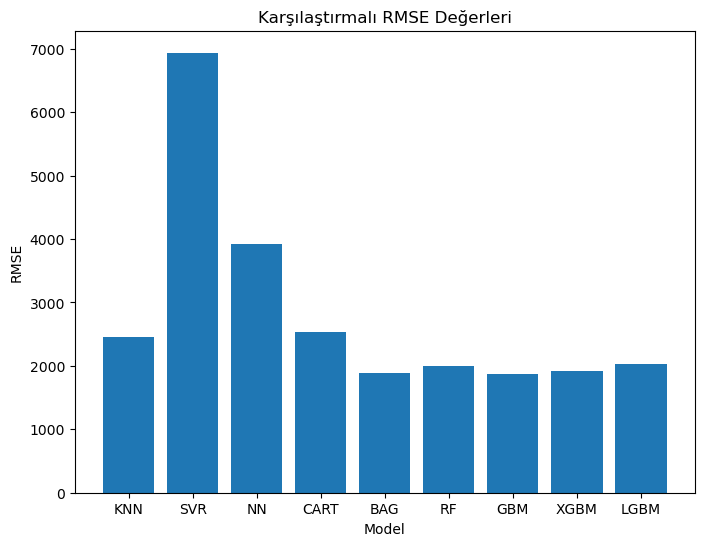

In [156]:
plt.figure(figsize=(8, 6))

plt.bar(df['Model'], df['RMSE'])
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Karşılaştırmalı RMSE Değerleri')

plt.show()

Yukarıda gözlemlenen sayısal değerler ve sütun  grafiği sonucunda modellerin 'RMSE' değerlerini görselleştirdim.'RMSE' değeri en düşük modelin 'Gradient Boosting Machine(GBM)' olduğunu gözlemledim. Eğitim süresi göz önüne alındığında yakın değerler veren modellerinde göz önünde bulundurulabilecek birer çözüm yöntemi olduğu kanısındayım.
Çalışmamı incelediğiniz için teşekkür ederim.
Saygılarımla, kolaylıklar dilerim.

Bilal Karacık